{% include toc title="In This Chapter" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Chapter One - Introduction to Time Series Data in Python 

In this chapter, you will learn how to work with the `datetime` object in 
**Python** which you need for plotting and working with time series data. 
You will also learn how to work with "no data" values in **Python**.


## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this chapter, you will be able to:

* Import a time series dataset using **pandas** with dates converted to a `datetime` object in **Python**.
* Use the `datetime` object to create easier-to-read time series plots and work with data across various timeframes (e.g. daily, monthly, yearly) in **Python**.
* Explain the role of "no data" values and how the `NaN` value is used in **Python** to label "no data" values.
* Set a "no data" value for a file when you import it into a **pandas** dataframe. 


## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need

You should have Conda setup on your computer and the Earth Analytics 
Python Conda environment. Follow the <a href="{{ site.url }}/workshops/setup-earth-analytics-python/setup-git-bash-conda/">Set up Git, Bash, and Conda on your computer</a> to install these tools.

Be sure that you have reviewed the <a href="{{ site.url }}/courses/intro-to-earth-data-science/">Introduction to Earth Data Science textbook</a> or are familiar with the **Python** programming 
language and the **pandas** package for working with dataframes. 

{% include/data_subsets/course_earth_analytics/_data-colorado-flood.md %}

</div>


## Why Use Datetime Objects in Python

Dates can be tricky in any programming language. While you may 
see a date in a dataset and recognize it as something that can 
be quantified and related to time, a computer reads in numbers 
and characters. Often by default, date information is loaded 
as a string (i.e. a set of characters), rather than something 
that has an order in time. 

The **Python** `datetime` object will make working with and plotting 
time series data easier. You can convert **pandas** dataframe 
columns containing dates and times as strings into `datetime` objects.

Below, you will find a quick introduction to working with and 
plotting time series data using Pandas. The following pages in 
this chapter will dive further into the details associated with 
using, manipulating and analyzing time series data.


### Import Packages and Get Data

To begin, import the packages that you need to work with tabular data in Python.  

In [1]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

Next, you set your working directory to:

`~/earth-analytics/data` 

And finally you open up the file: `805325-precip-dailysum-2003-2013.csv`
which is a `.csv` file that contains precipitation data for 
Boulder, Colorado for 2003 to 2013 when the flood occurred 
in Colorado.

<div class="notice--success alert alert-info">
    
<i class="fa fa-star"></i> **Data Tip:**
You can read more about the data used in this lesson in the 
<a href="https://www.earthdatascience.org/courses/use-data-open-source-python/data-stories/colorado-floods-2013/how-rain-impacts-floods/">data story 
the discusses the Colorado flood.</a>   
</div>


In [2]:
# Download the data
data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', "data"))

Next, open the precipitation data for Boulder, Colorado. Look at the structure
of the data.

In [3]:
# Define relative path to the data
file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


Plot the data using the `DAILY_PRECIP` column. What do you notice about 
the plot?

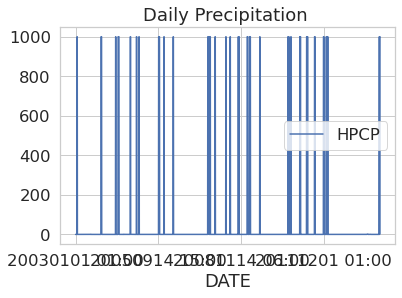

In [4]:
boulder_precip_2003_2013.plot(x="DATE",
                              y="HPCP",
                              title="Daily Precipitation ")
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 1: Review Metadata

In the cell below list the things that you think look "wrong" with the plot 
above. 

**Next, read the `PRECIP_HLY_documentation.pdf` metadata document that was included
with the data before answering items 1-4.**

1. Do the data have a no data value?
2. How are missing data "identified" in the table"?
3. How frequently are the data recorded (every second, minute, hour, day, week, etc?)?
4. What are the units of the data (NOTE - this may be a "trick" question :) ). But see what you can find in the metadata. 

HINT: the next few cells may help you explore the data to better understand 
what is going on with it. 
</div>

*Answers for the above challenge*

1. Not directly, no. 
2. It's flagged in the flags column instead of assigned a value in the HPCP column.
3. Hourly
4. Mean Cubic Feet per Second in an hour. 

### Time Series Data Cleaning & Exploration

The data above do not look quite right. Take some time to explore the data to 
better understand what you need to clean up.

In [5]:
# Look at the range of values in the data - specifically the HPCP column
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [6]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

You may have observed several anomalies in the data.

1. The data seem to have a very large number: 999.99. More often than note, a value of 999 represents a no data value that needs to be removed from your data. 
2. You may have noticed that your x axis date values in the plot look "messy". When you see an x-axis like this but you know your data are time series, it's most often caused by your datetime data not being read in properly as numeric date times. 

You can address all of these issues using the following `read_csv()` parameters:

* `parse_dates=`: Column containing date information that should be read into the `DataFrame` as a datetime object.
* `na_values=`: Values in the file that should be replaced with `NaN` (Not a Number).
* `index_col=1`: optional -- but this will make subsetting the data much easier


In [7]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       # Make sure the dates import in datetime format
                                       parse_dates=['DATE'],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col=['DATE'],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=['999.99'])

# View the data
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


Notice above that the DATE column header is visually lower than the other 
columns and the entire column is bold. This represents the DATE column as an 
index. You set the DATE column as an index above using the parameter:

`index_col=['DATE']`

Once your date values are an index, you can more easily subset the data 
by time period. You will learn how to do this below. 

In [8]:
# View summary statistics == Notice the DATE column is not included
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


Notice that once you remove no data values, the min and max
values for the HPCP column are more reasonable for hourly 
precipitation ranging from 0 to 2.2.


### Using An Index In Pandas

Above, you used `index_col=['DATE']` to get the date column to be an index for 
the Pandas DataFrame. Assigning an index column is helpful when using timeseries 
data as it allows you to easily subset your data by time (see below for an
overview of subsetting data). 

It is also important to know that once a column is an index, you need to call 
it differently. For instance, below you run `.dtypes` on your data. Notice that 
`DATE` is no longer a column described in your dataframe. 

In [9]:
# Where is the date column
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object


You can still access the DATE column as an index column using `.index`:

`data-frame-name.index`

Try it out. Notice that below the output of `.index` is a `datetime64` 
object. 

In [10]:
# View the index for your data frame
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

You can also reset the index if you want it to turn it back into a normal
column using `data-frame.reset_index()`

In [11]:
boulder_precip_2003_2013.reset_index()

,DATE,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
0,2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
1,2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2,2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
3,2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
4,2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...,...
1835,2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
1836,2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
1837,2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,
1838,2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,


Now that you have cleaned up the data, you can plot it. Below, you use 
`.plot()` to plot. If you have an index column, then `.plot()` will automatically
select that column to plot on the x-axis. You then only need to specify the 
y-axis column.

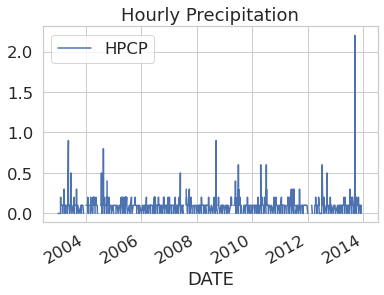

In [12]:
boulder_precip_2003_2013.plot(y="HPCP",
                              title="Hourly Precipitation")
plt.show()

## Subset Time Series Data by Time

Once you have cleaned up your data, and assigned a datetime index, 
you can quickly begin to plot and summarize 
data by time periods. Below you subset the data for 2005.

In [13]:
# Subset data from 2005
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [14]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()

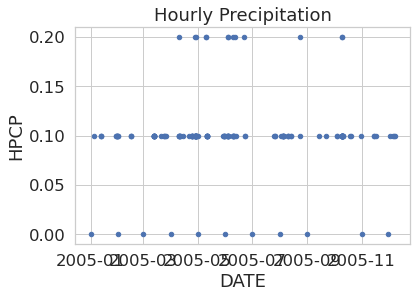

In [15]:
# Plot the data using pandas

precip_2005_clean.reset_index().plot(x="DATE",
                                     y="HPCP",
                                     title="Hourly Precipitation",
                                     kind="scatter")
plt.show()

While you can plot data with pandas, it's often easier to simply use matplotlib
directly as this gives you more control of your plots. Below you create a scatter 
plot of the data using `ax.scatter`.

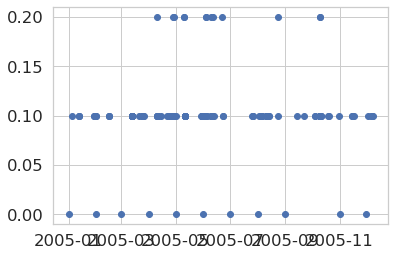

In [16]:
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
           y=precip_2005_clean["HPCP"])
plt.show()

## Resample Time Series Data

Resampling time series data refers to the act of summarizing data 
over different time periods. For example, above you have been working 
with hourly data. However, you may want to plot data summarized by day.

You can resample time series data in Pandas using the `resample()`
method. Within that method you call the time frequency for which 
you want to resample. Examples including day (`"D"`) or week `("w")`.

When you resample data, you need to also tell Python how you wish 
to summarize the data for that time period. For example do you want 
to summarize or add all all values for each day?

`precip_2005_clean.resample("D").sum()`

or do you want a max value:

`precip_2005_clean.resample("D").max()`

Below you resample the 2005 data subset that you created above, and 
then you plot it. [Resampling is discussed in more detail later in this 
chapter.](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/resample-time-series-data-pandas-python/)

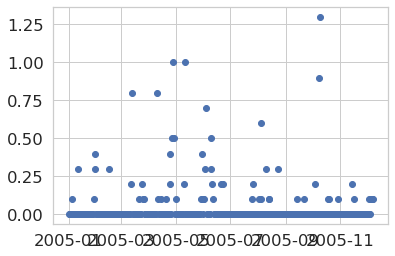

In [17]:
precip_2005_daily = precip_2005_clean.resample("D").sum()
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values,
           y=precip_2005_daily["HPCP"])
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 2: Plot Multiple Axes

If you recall from previous lessons, you can create a figure with
multiple subplots using: 

`f, (ax1, ax2) = plot.subplots(2,1)`

In the cell below, do the following

1. Create a variable that contains precipitation data from 2012 and a second variable that contains data from 2013.
2. Plot each variable on a subplot within a matplotlib figure. The 2012 data
should be on the top of your figure and the 2013 data should be on the bottom.

Then answer the following questions:

1. In which year 2012 or 2013 do you see the highest hourly precipitation value(s)?
2. What is the max hourly precipitation value for each year? HINT: `data-frame.max()`
should help you answer this question. 

Customize your plots with x and y axis labels and titles. 
</div>


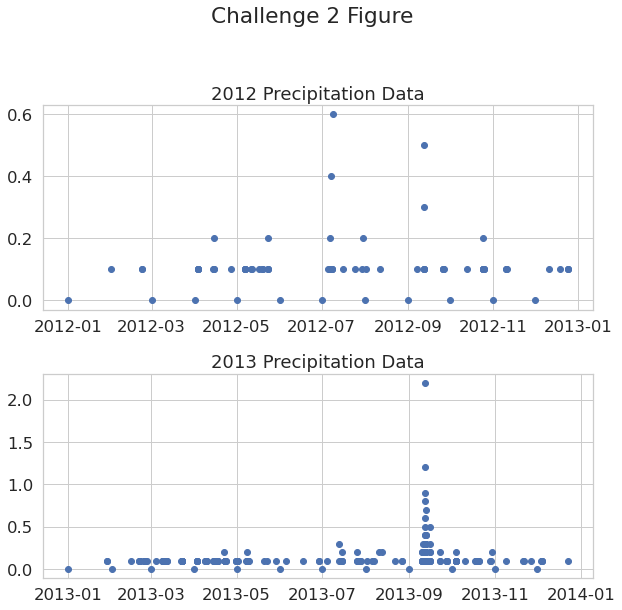

In [18]:
# Place your code for your figure for the challenge above, here
precip_2012 = boulder_precip_2003_2013["2012"]
precip_2013 = boulder_precip_2003_2013["2013"]

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 9))

ax1.scatter(x=precip_2012.index.values,
            y=precip_2012.HPCP)


ax2.scatter(x=precip_2013.index.values,
            y=precip_2013.HPCP)
f.suptitle("Challenge 2 Figure")

ax1.set(title="2012 Precipitation Data")
ax2.set(title="2013 Precipitation Data")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
# Answers to the above challenge

max_2012 = precip_2012["HPCP"].max()
max_2013 = precip_2013["HPCP"].max()

# 2013 had the higher hourly precipitation values

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 3: Modify Plot x and y Limits

Have a look at the min and max values in your plots above. Do you notice 
anything about the y-axis that may make the data look similar when in 
reality one year has much higher values compared to the other?

Recreate the same plot that you made above. However, this time set the 
y limits of each plot to span from 0 to 2.

`ax1.set(ylim=[0, 2])`

Customize your plot by changing the colors.

Add your plot code to the cell below. 
</div>

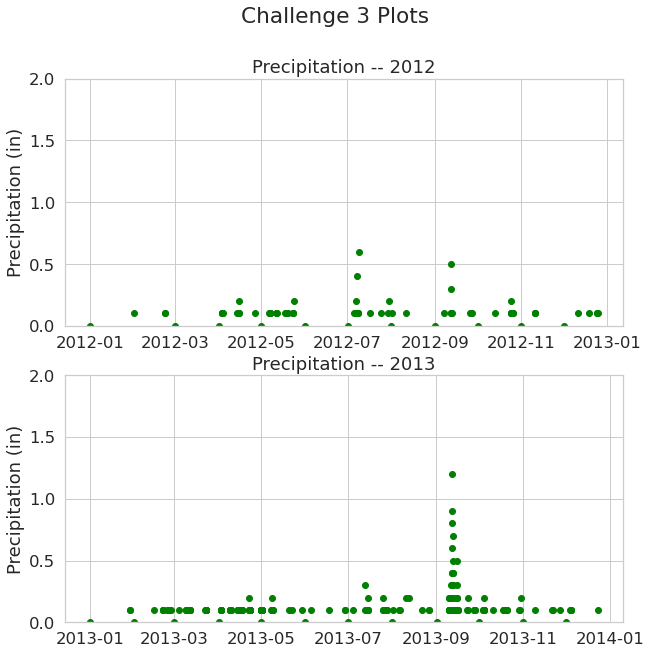

In [20]:
# Place your code for your figure for the challenge above, here

precip_2012 = boulder_precip_2003_2013["2012"]
precip_2013 = boulder_precip_2003_2013["2013"]

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.scatter(x=precip_2012.index.values,
            y=precip_2012.HPCP,
            color="green")

ax2.scatter(x=precip_2013.index.values,
            y=precip_2013.HPCP,
            color="green")

f.suptitle("Challenge 3 Plots")
ax1.set(ylim=[0, 2],
        title="Precipitation -- 2012",
        ylabel="Precipitation (in)")
ax2.set(ylim=[0, 2],
        title="Precipitation -- 2013",
        ylabel="Precipitation (in)")
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 4: Data Subsets

Above you subset the data by year and plotted two years in the same figure.
You can also create temporal subsets using dates to create subsets that 
span across specific dates of the year - like this:

`data_frame_name['2005-05-01':'2005-06-31']`

In the cell below create a **scatter plot** of your precipitation data. 
Subset the data to the date range September 1, 2013 (2013-09-01) to
November 1, 2013 (2013-11-01).

</div>

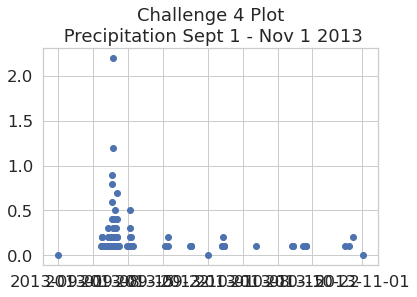

In [21]:
# Place your code to plot your data here
flood_data = boulder_precip_2003_2013['2013-09-01':'2013-11-01']

f, ax = plt.subplots()

ax.scatter(x=flood_data.index.values,
           y=flood_data["HPCP"])
ax.set(title="Challenge 4 Plot\n Precipitation Sept 1 - Nov 1 2013")

plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Bonus Challenge: Formatting Dates on the X-Axis

You may have noticed the dates look a little messy on the x-axis. Remake the plot from above, but use <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/">this lesson</a> on customizing the format of time ticks on the x-axis of a plot to adjust the x-axis to be more legible.

</div>

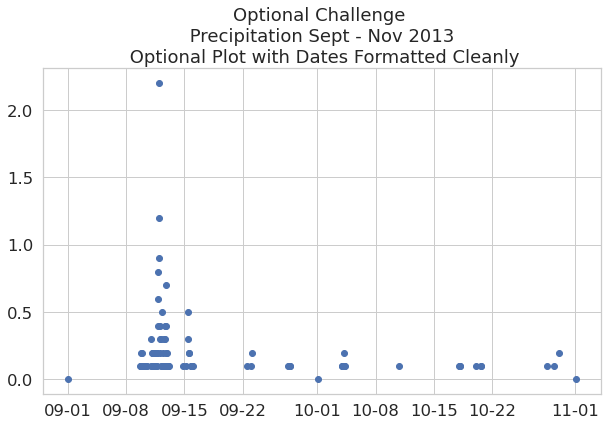

In [22]:
from matplotlib.dates import DateFormatter

# Place your code to plot your data here
flood_data = boulder_precip_2003_2013['2013-09-01':'2013-11-01']

f, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x=flood_data.index.values,
           y=flood_data["HPCP"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set(title="Optional Challenge \n Precipitation Sept - Nov 2013 \n Optional Plot with Dates Formatted Cleanly")
plt.show()

## Summary

This lesson provides a high level overview of working with dates using 
Pandas in Python. The rest of this chapter will dive into more detail
surrounding working with dates, subsettings and also customizing date time
labels on plots. 